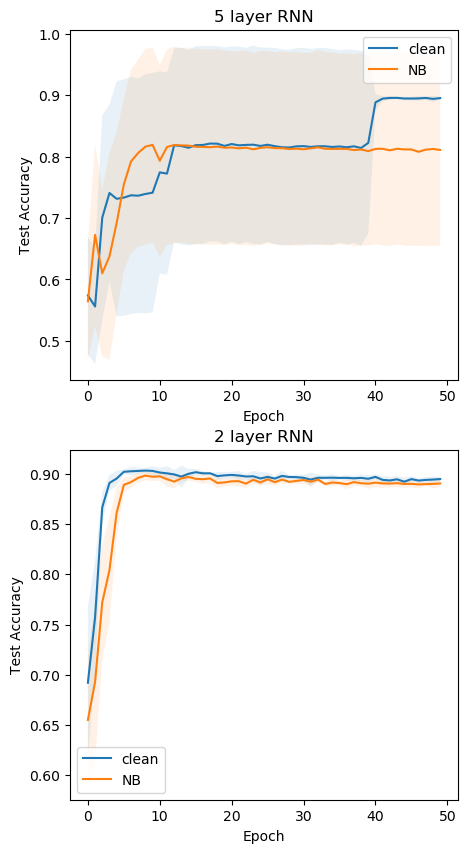

In [22]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(5, 10))

x_values = list(range(50))

vals = []
for size_pos, size in enumerate(['5-layers', '2-layers']):
    l = []
    for type_pos, type in enumerate(['clean', 'NB']):
        tot_list = []
        for iteration in range(5):
            with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/iteration-{iteration}-rnn_imdb-{size}-{type}-hist.pkl', 'rb') as file:
                tot_list.append(pickle.load(file)['test_acc'])
        tot_list = np.array(tot_list)
        mean = np.mean(tot_list, axis=0)
        std = np.std(tot_list, axis=0)
        axs[size_pos].plot(x_values, mean, label=type)
        axs[size_pos].fill_between(x_values, mean-std, mean+std, alpha=0.1)
        axs[size_pos].legend()

        axs[size_pos].set_title(f'{size[0]} layer RNN')
        axs[size_pos].set_xlabel('Epoch')
        axs[size_pos].set_ylabel('Test Accuracy')



    vals.append(l)

In [30]:
for size in ['5-layers', '2-layers']:
    print("{:>15}".format(size))
    print("{:<15}".format("training type"), "{:<15}".format("mean"), "{:<15}".format("std"))
    for type in ['clean', 'NB']:
        tot_list = []
        for iteration in range(5):
            with open(f'/baldig/proteomics2/ian/Neural-Balance/personalExps/IMDbRnn/hist/iteration-{iteration}-rnn_imdb-{size}-{type}-hist.pkl', 'rb') as file:
                tot_list.append(pickle.load(file)['test_acc'])
        tot_list = np.array(tot_list)
        mean = np.mean(tot_list, axis=0)
        std = np.std(tot_list, axis=0)
        t = type
        pos = np.argmax(mean)
        m = mean[pos]
        st = std[pos]
        ft = "{:<15}".format(t)
        fm = "{:<5}".format(m)
        fs = "{:<5}".format(st)
        print(ft, fm, fs)
    print()

       5-layers
training type   mean            std            
clean           0.8955420199087112 0.0018060327050679302
NB              0.8190766244621599 0.1585941651445511

       2-layers
training type   mean            std            
clean           0.9033545199087112 0.00259683988179996
NB              0.8984021895012614 0.004420845428398311

